# Least squares regression
![linear regression](https://images.unsplash.com/photo-1539651044670-315229da9d2f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)
photo by [Edan Cohen](https://unsplash.com/@edanco) at [Unsplash](https://unsplash.com/)

## Introduction

this is the companion colab code for my tutorial in medium about Least square regression
 in Python with genomic data, please read the article for better understanding of the code. In the article I discuss about the theory, the hyperparameters, how to efficiently use the techniques. Here I am providing just generic information about the algorithm and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about Least squares regression math](https://)



note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Least regression with only one variable

Let's start with one variable, then we will do with more variables for the input.

In [ ]:

n= 20
noise = 3
df = pd.DataFrame()
df["x1"] = np.linspace(-10, 10, num = n) 
df["x0"] = np.ones(n)
w = np.array([2,3])
X = df.to_numpy() # to make matrix multiplication easier
y =  w.dot(X.transpose())
y = np.random.normal(y,noise)
y

array([-13.38573996, -17.1359596 ,  -6.08707936,  -8.27875873,
        -7.41470185,  -3.81137474,  -3.76880674,  -6.05047929,
         2.10406239,   5.11691294,  12.75196988,   7.45972383,
         3.78529725,   7.87460144,  12.04826959,  13.90042423,
        16.7468149 ,  18.05215   ,  21.88595423,  27.31334622])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


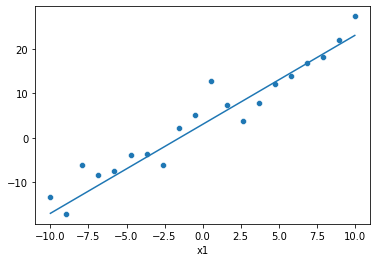

In [ ]:
#plotting the line and the point
plt.plot(np.linspace(-10, 10, num = n), w.dot(X.transpose()))
sns.scatterplot(df["x1"], y)

In [ ]:
# Least Square
#I am showing here all the passages
# w = (X^T * X)^-1 (X^T*t)

# X^T
X_transposte = X.transpose()

# (X^T * X)
XT_dot_X = X_transposte.dot(X)

# (X^T * X)^-1
XT_dot_X_inv = (np.linalg.inv(XT_dot_X))

# (X^T*t)
XT_dot_t = X_transposte.dot(t)

# w = (X^T * X)^-1 (X^T*t)
w = XT_dot_X_inv.dot(XT_dot_t)

# y model
y = X.dot(   w)


## with more than one X variable

we are generating our data, starting from X we get y, we are choosing some arbitray weight to generate the values of y. later we will try to predict using the least squares method.

notice we are using some arbitrary weights, for generating the data. the Y (true values) is generating multiplying X for the weights and adding some noise (mimicking a real dataset). You can play around with the weights and to observe how similar are the weight returning by the model. Notice, the weights are similar but not perfectly the same (since we have add some noice).

In [ ]:
def dataset_gen(w = None, n = 100, noise = 0 ):
  """ generate random data for least square regression"""
  x1 = np.linspace(-10, 10, num = n) #we create random number 
  x2 = np.random.normal(x1,5) #we have to add noise otherwise we cannot invert the matrix later
  X  = np.array([np.ones(len(x1)), x1, x2]) #we are generating X0, or the  bias
  _w = np.array(w)
  y =  _w.dot(X) #we generate a y
  y = np.random.normal(y,noise) #we add some noise
  return X, y 


In [ ]:
#we are writing a function that is doing the passage we seen before
#instead to do separatly we use a simple function
def least_square(X,y):
  """ perform least square regression"""                     
  Xt = X.dot(y)
  XX = np.linalg.inv(X.dot(X.T))
  XX = np.round(XX,4)
  Xt = np.round(Xt,2)    
  w  = XX.dot(Xt)
  w  = np.round(w,2)
   
  return w

In [ ]:
#generate data
w = [10,2,5]
noise = 10
X, y = dataset_gen(w = w, n = 100, noise = noise )

In [ ]:
#let's use our function and check the weight obtained
w_ls = least_square(X,y)
print(w_ls)

[10.09  4.15  5.58]


In [ ]:
#generate the prediction
y_pred  = w_ls.dot(X)     
# Root of Mean Sum of Squared Error                   
RMSE = np.sqrt(((y -y_pred )**2).sum()/len(y))
RMSE

19.598548246161158

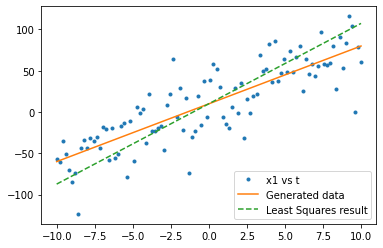

In [ ]:
w = np.array(w)
w_ls = np.array(w_ls)
plt.plot(X[1],y,'.', label='x1 vs t')
x1 = np.linspace(-10, 10, num = 100)
X_ = np.array([np.ones(len(x1)), x1, x1])
plt.plot(x1, w.dot(X_) ,'-' , label='Generated data')
plt.plot(x1, w_ls.dot(X_) ,'--', label='Least Squares result')
plt.legend()

## An example with scikit-learn

I will show you here a simple example with the boston dataset and using the least square method. Linear regressor estimator in Scikit-learn is using ordinary least square (so, under the hood is the same procedure, but of course you do not have to write least square function with scikit-learn). 

[linear regression in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

the boston dataset variables:
The data contains the following columns:

* 'crim': per capita crime rate by town.
*'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
*'indus': proportion of non-retail business acres per town.
*'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
*'nox': nitrogen oxides concentration (parts per 10 million).
*'rm': average number of rooms per dwelling.
*'age': proportion of owner-occupied units built prior to 1940.
*'dis': weighted mean of distances to five Boston employment centres.
*'rad': index of accessibility to radial highways.
*'tax': full-value property-tax rate per $10,000.
*'ptratio': pupil-teacher ratio by town
*'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
*'lstat': lower status of the population (percent).
*'medv': median value of owner-occupied homes in $$1000s

we will predict the 'medv' variable.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
%matplotlib inline

In [ ]:
dataset = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv"
df = pd.read_csv(dataset)
df = df.iloc[:,1:] #the first column is not useful (is an ID columns)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#prepare X and Y
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df['medv'] #this is our target variable
#stratify
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                        test_size = 0.2, #test size would be 20%
                                                        random_state = 42, #42 is for good luck!
) 
#noticed we have not stratified the data as in classification tasks
#stratify is for balancing the categories in the sampling, but here the variable is continuous
#scaling the white
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #this to avoid information leakage

Mean Absolute error (MAE) : 3.1890919658878483
Mean Squared Error (MSE): 24.29111947497352
Root Mean Squared Error (MSE): 4.928602182665337


Text(0, 0.5, 'LS prediction')

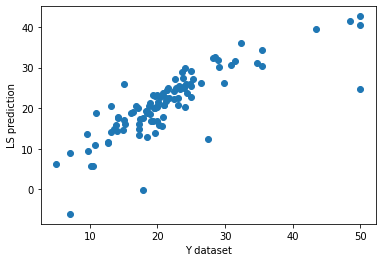

In [ ]:
model = LinearRegression() #initialize...
model.fit(X_train,y_train) #train the model...
y_pred = model.predict(X_test) #predict! 
#evaluate the model: on the evaluation metric I will go in deep in the next tutorial
print('Mean Absolute error (MAE) :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (MSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#visualize
plt.scatter(y_test, y_pred)
plt.xlabel('Y dataset')
plt.ylabel('LS prediction')

## Bonus: nice visualization with yellowbricks

The Yellowbrick library is a python library which allows you diagnostic your model, conduct visualization and many more things. 

[Yellowbrick](https://www.scikit-yb.org/en/latest/)

we will plot:
* **Residuals Plot** which is showing the difference between real values and the predicted values. The model is also plotting the R^2 for train and test set.
* **Prediction error plot** this plot is showing the true values against the prediction, the 45° line represent the optimal line, more our fitted line is far, less the model is accurate

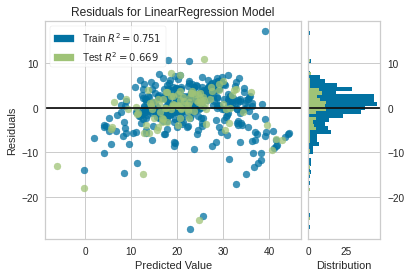

In [ ]:
# residual plot
model = LinearRegression()
visualizer = ResidualsPlot(model) #we use yellowbrick wrapper

visualizer.fit(X_train, y_train)  # we fit the model
visualizer.score(X_test, y_test)  # test set evaluation
g = visualizer.poof() #plotting!

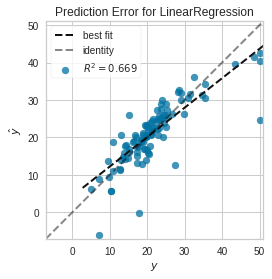

In [ ]:
#similarly we use the wrapper
#prediction error plot
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()  